In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Luna16/candidates_V2.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
    # you have to loop through the document to get each data
      if item[4] == '1':
        count+=1
print(count)

1557


In [ ]:
import csv

with open("/content/drive/MyDrive/Luna16/candidates_V2.csv", mode="r") as old_file:
    reader_obj = csv.reader(old_file) #read the current csv file

    with open("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv", mode="w") as new_file:
        writer_obj = csv.writer(new_file, delimiter=",") # Writes to the new CSV file 

        for data in reader_obj:
          if data[4] == '1':
            #loop through the read data and write each row in new_demo_csv.csv
            writer_obj.writerow(data)

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
      count+=1
    # you have to loop through the document to get each data
      # if item[4] == '1':
      #   count+=1
print(count)

1557


In [ ]:
pip install SimpleITK 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

In [ ]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpy_image = sitk.GetArrayFromImage(itkimage)
    
    numpy_origin = np.array(list(reversed(itkimage.GetOrigin())))
    # size of pixels
    numpy_spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpy_image, numpy_origin, numpy_spacing

In [ ]:
load_itk_image("/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd")

(array([[[-1020, -1008,  -982, ...,  -950,  -977, -1006],
         [-1013, -1016,  -997, ...,  -965,  -978,  -980],
         [-1002, -1013, -1017, ...,  -966,  -969,  -973],
         ...,
         [ -965,  -953,  -897, ...,  -415,  -579,  -736],
         [-1000,  -917,  -860, ...,  -913,  -968,  -994],
         [ -936,  -840,  -877, ..., -1012, -1016, -1024]],
 
        [[ -992, -1001,  -973, ...,  -975,  -982,  -996],
         [ -985,  -979,  -972, ...,  -950,  -993, -1015],
         [-1019,  -998,  -969, ...,  -989, -1004, -1015],
         ...,
         [ -895,  -894,  -875, ...,  -504,  -621,  -783],
         [ -908,  -865,  -824, ...,  -967, -1017,  -987],
         [ -876,  -814,  -844, ..., -1024, -1024, -1024]],
 
        [[ -972,  -978,  -988, ..., -1008, -1005, -1013],
         [ -955,  -964,  -970, ...,  -989,  -979,  -978],
         [ -962,  -963,  -954, ...,  -980,  -989,  -997],
         ...,
         [ -981,  -842,  -805, ...,  -443,  -673,  -944],
         [ -905,  -812, 

In [ ]:
def readcsv(filename):
    lines = []
    with open(filename, "rt") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

In [ ]:
# world coordinates = real-life, voxel = in arrays
def world_to_voxel(world_coord, origin, spacing):
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

In [ ]:
def normalize_planes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1.
    npzarray[npzarray < 0] = 0.
    return npzarray

In [ ]:
def image_details(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(numpy_image.shape)
    print(numpy_origin)
    print(numpy_spacing)

In [ ]:
image_details('/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd')

(194, 512, 512)
[-438.4     -311.67773 -157.67773]
[1.79999995 0.64453125 0.64453125]


In [ ]:
def visualize_slice(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(len(numpy_image), numpy_origin, numpy_spacing, int(numpy_image.shape[0]/2))
    patch = numpy_image[int(numpy_image.shape[0]/2),
                        0:512,
                        0:512]
    plt.imshow(patch, cmap='gray')
    plt.show()

194 [-438.4     -311.67773 -157.67773] [1.79999995 0.64453125 0.64453125] 97


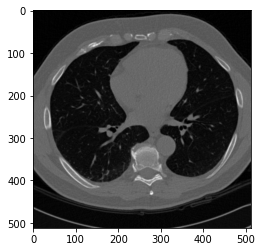

In [ ]:
visualize_slice('/content/drive/MyDrive/Ramasubramanya/LotusFeet/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd')

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860

In [ ]:
import pandas as pd

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Luna16/candidates_V2.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
    # you have to loop through the document to get each data
      if item[4] == '0':
        count+=1
print(count)

753418


In [ ]:
import csv

with open("/content/drive/MyDrive/Luna16/candidates_V2.csv", mode="r") as old_file:
    reader_obj = csv.reader(old_file) #read the current csv file

    with open("/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv", mode="w") as new_file:
        writer_obj = csv.writer(new_file, delimiter=",") # Writes to the new CSV file 

        for data in reader_obj:
          if data[4] == '0':
            #loop through the read data and write each row in new_demo_csv.csv
            writer_obj.writerow(data)

In [ ]:
import csv #import to use the csv module
count = 0
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv', mode="r") as csv_file: #"r" represents the read mode
    reader = csv.reader(csv_file) #this is the reader object

    for item in reader:
      count+=1
    # you have to loop through the document to get each data
      # if item[4] == '1':
      #   count+=1
print(count)

753418


In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]
    candidate_path = '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv'  
    cands = readcsv(candidate_path)
    
    for cand in cands[low:high]:
        print(cand)
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 96
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


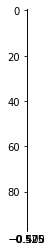

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


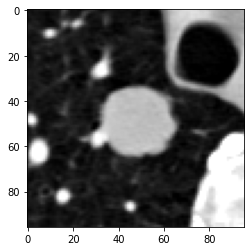

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


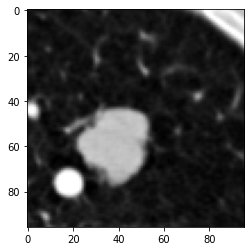

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


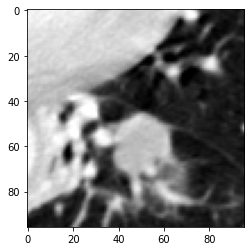

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


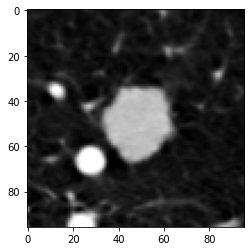

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


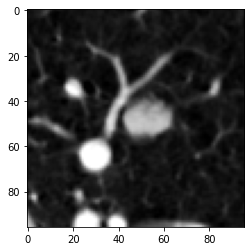

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


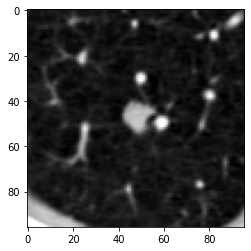

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


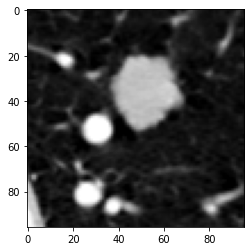

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


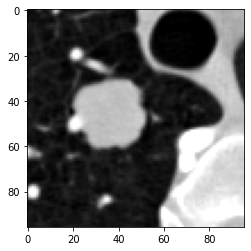

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


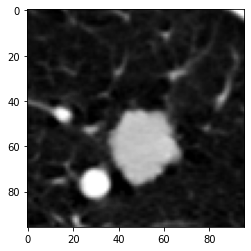

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


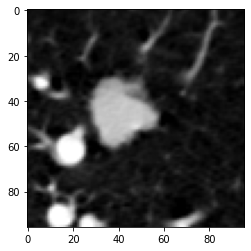

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


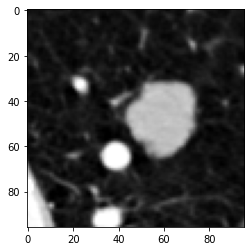

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


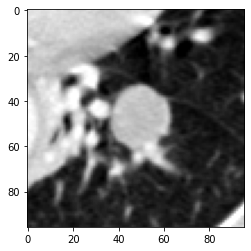

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


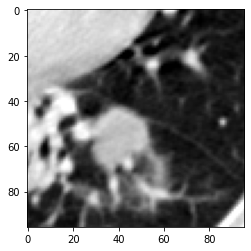

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


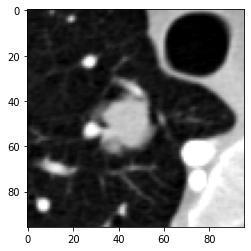

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


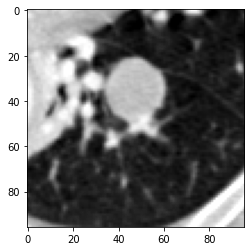

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


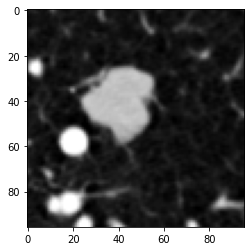

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
[22, 23, 24]
low: 22
high: 24
['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '96.28467267', '19.03486907', '-88.47844082', '1']
[-88.47844082  19.03486907  96.28467267]
[122.40862367 278.14966583 343.95307365]
[[0.80642857 0.78571429 0.77785714 ... 0.63142857 0.62285714 0.63714286]
 [0.82071429 0.805      0.78571429 ... 0.62285714 0.61857143 0.62      ]
 [0.80071429 0.81142857 0.81357143 ... 0.63714286 0.63285714 0.61714286]
 ...
 [0.13142857 0.11285714 0.10642857 ... 0.74357143 0.725      0.73357143]
 [0.08857143 0.06428571 0.06428571 ... 0.71714286 0.72857143 0.74285714]
 [0.07857143 0.08214286 0.08571429 ... 0.74785714 0.73785714 0.74214286]]


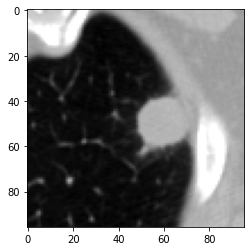

['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '106.18', '12.61', '-96.81', '1']
[-96.81  12.61 106.18]
[119.076      270.67345455 355.46763636]
[[1.         0.83714286 0.65357143 ... 0.62785714 0.635      0.625     ]
 [1.         0.98928571 0.76       ... 0.62571429 0.635      0.62428571]
 [1.         1.         0.86714286 ... 0.63642857 0.63642857 0.62285714]
 ...
 [0.05142857 0.05214286 0.07       ... 0.71285714 0.72071429 0.73214286]
 [0.06071429 0.06285714 0.06928571 ... 0.73571429 0.73857143 0.74714286]
 [0.06785714 0.06285714 0.06785714 ... 0.71142857 0.71071429 0.72642857]]


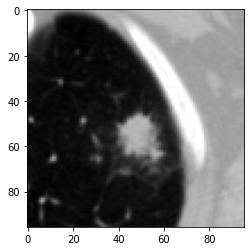

count: 5
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
[25]
low: 25
high: 25
count: 6
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
[26]
low: 26
high: 26
count: 7
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774
[27]
low: 27
high: 27
count: 8
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
[28, 29]
low: 28
high: 29
['1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949', '-70.748125', '67.2790625', '-160.9525', '1']
[-160.9525      67.2790625  -70.748125 ]
[ 89.438  342.1172 165.4424]
[[0.81285714 0.76       0.86714286 ... 0.70357143 0.72928571 0.78928571]
 [0.82714286 0.78071429 0.83642857 ... 0.86928571 0.925      0.84857143]
 [0.81571429 0.80928571 0.76571429 ... 0.99857143 0.99571429 0.94071429]
 ...
 [0.66928571 0.645      0.65642857 ... 0.63071429 0.65071429 0.69214286]
 [0.65428571 0.61285714 0.62285714 ... 0.63428571 0.65357143 0.66071429]
 [0.68714286 0.63642857 0.64357143 ... 0.635      0.67928

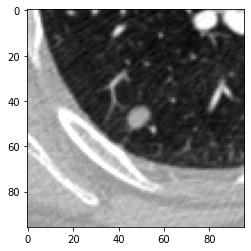

count: 9
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872
[30]
low: 30
high: 30
count: 10
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375
[31]
low: 31
high: 31
count: 11
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943
[32, 33, 34, 35]
low: 32
high: 35
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-102.5', '-74', '-220', '1']
[-220.   -74.  -102.5]
[ 62.         154.96530811 116.05331444]
[[0.06285714 0.05285714 0.01       ... 0.70071429 0.55571429 0.69142857]
 [0.         0.09785714 0.03785714 ... 0.61428571 0.82428571 0.72357143]
 [0.085      0.         0.         ... 0.83071429 0.77071429 0.69357143]
 ...
 [1.         0.81571429 0.86571429 ... 0.05928571 0.00857143 0.08      ]
 [0.895      0.89857143 0.91071429 ... 0.12357143 0.16714286 0.09285714]
 [0.97928571 0.90642857 0.97       ... 0.13785714 0.08357143 0.09142857]]


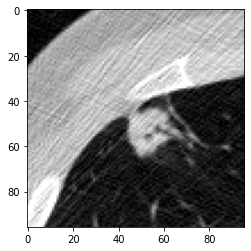

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-97.54122491', '-73.36723259', '-222.9974028', '1']
[-222.9974028   -73.36723259  -97.54122491]
[ 59.60207776 155.82924641 122.82369427]
[[0.015      0.07428571 0.02785714 ... 0.80714286 0.80785714 0.72071429]
 [0.125      0.00428571 0.05142857 ... 0.77714286 0.69428571 0.77571429]
 [0.05071429 0.02642857 0.02571429 ... 0.78928571 0.80857143 0.79357143]
 ...
 [0.62071429 0.17928571 0.04142857 ... 0.16714286 0.22071429 0.37357143]
 [0.455      0.12928571 0.10857143 ... 0.32857143 0.36571429 0.43357143]
 [0.225      0.15428571 0.08785714 ... 0.28142857 0.26785714 0.43071429]]


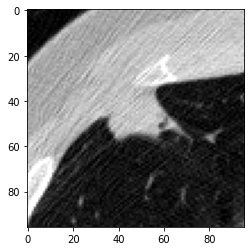

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-100.9691565', '-66.4213815', '-217.94', '1']
[-217.94       -66.4213815 -100.9691565]
[ 63.648      165.31264689 118.14342576]
[[0.         0.06785714 0.05285714 ... 0.57571429 0.58571429 0.71071429]
 [0.         0.         0.         ... 0.62       0.79214286 0.72285714]
 [0.04857143 0.03285714 0.         ... 0.79785714 0.72714286 0.76714286]
 ...
 [1.         0.72571429 0.50714286 ... 0.02071429 0.04785714 0.09928571]
 [0.835      0.60571429 0.43642857 ... 0.10428571 0.05285714 0.01      ]
 [0.66642857 0.56857143 0.17285714 ... 0.04928571 0.00857143 0.12428571]]


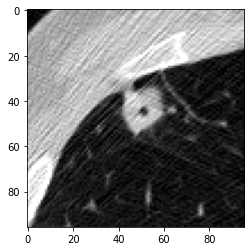

count: 12
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
[36, 37, 38, 39, 40, 41]
low: 36
high: 41
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-68.88594854', '-80.49293991', '-190.126323', '1']
[-190.126323    -80.49293991  -68.88594854]
[113.373677   427.27940247 133.46901402]
[[0.08642857 0.20357143 0.26357143 ... 0.21785714 0.28214286 0.52142857]
 [0.145      0.29428571 0.27428571 ... 0.13285714 0.14285714 0.41285714]
 [0.15571429 0.20214286 0.16928571 ... 0.06928571 0.07642857 0.30142857]
 ...
 [0.59285714 0.61714286 0.61785714 ... 1.         1.         1.        ]
 [0.61714286 0.61642857 0.60071429 ... 1.         0.96       0.85071429]
 [0.65785714 0.66428571 0.64       ... 0.77428571 0.74357143 0.68357143]]


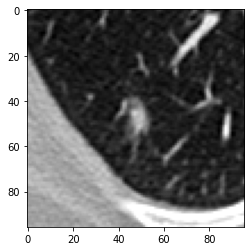

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '101.25', '-180.465', '-224.345', '1']
[-224.345 -180.465  101.25 ]
[ 79.155      262.16425806 414.46774194]
[[0.93071429 0.90571429 0.93857143 ... 0.86571429 0.72357143 0.69357143]
 [0.855      0.86       0.90071429 ... 0.83357143 0.715      0.69928571]
 [0.855      0.89071429 0.92142857 ... 0.84785714 0.73928571 0.74071429]
 ...
 [0.65571429 0.62214286 0.60357143 ... 0.33928571 0.55642857 0.64928571]
 [0.695      0.67785714 0.62642857 ... 0.39428571 0.59       0.65      ]
 [0.66428571 0.67428571 0.61928571 ... 0.41714286 0.61571429 0.65857143]]


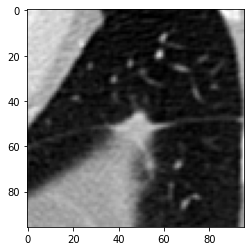

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-46.54104772', '-66.80022363', '-207.6218183', '1']
[-207.6218183   -66.80022363  -46.54104772]
[ 95.8781817  449.89446936 170.37414054]
[[0.13       0.11       0.07571429 ... 0.34928571 0.67       1.        ]
 [0.10714286 0.11357143 0.10714286 ... 0.36714286 0.67785714 1.        ]
 [0.07571429 0.09928571 0.10714286 ... 0.36142857 0.69285714 0.95      ]
 ...
 [0.66       0.64571429 0.63357143 ... 0.63142857 0.61071429 0.66285714]
 [0.66714286 0.675      0.65714286 ... 0.59785714 0.59357143 0.62642857]
 [0.65142857 0.66714286 0.665      ... 0.61357143 0.63071429 0.63357143]]


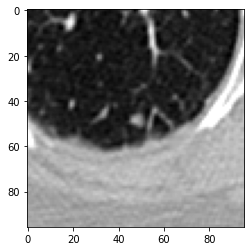

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-107.1644726', '-146.6638704', '-186.3209291', '1']
[-186.3209291 -146.6638704 -107.1644726]
[117.1790709  317.99063986  70.24770977]
[[0.64       0.61857143 0.64357143 ... 0.07071429 0.06642857 0.08357143]
 [0.63428571 0.59857143 0.62428571 ... 0.06071429 0.02714286 0.01714286]
 [0.61928571 0.605      0.62571429 ... 0.17       0.09214286 0.025     ]
 ...
 [0.73642857 0.77357143 0.75928571 ... 0.10285714 0.08785714 0.02214286]
 [0.69142857 0.685      0.74785714 ... 0.06642857 0.06357143 0.04214286]
 [0.68214286 0.7        0.73285714 ... 0.05285714 0.04928571 0.05928571]]


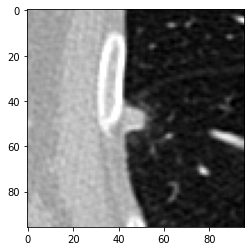

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '122.3370789', '-175.9876589', '-194.1075', '1']
[-194.1075    -175.9876589  122.3370789]
[109.3925     269.5590924  449.29543354]
[[0.01357143 0.03428571 0.09285714 ... 0.64714286 0.66714286 0.67428571]
 [0.06928571 0.09285714 0.09285714 ... 0.61785714 0.63214286 0.645     ]
 [0.07571429 0.08       0.04571429 ... 0.64071429 0.63214286 0.62857143]
 ...
 [0.08785714 0.07071429 0.05785714 ... 0.60857143 0.61       0.59285714]
 [0.08142857 0.07928571 0.07428571 ... 0.645      0.65285714 0.63      ]
 [0.085      0.10357143 0.08214286 ... 0.67071429 0.66642857 0.64785714]]


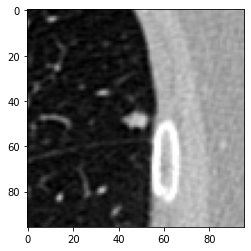

count: 13
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[42]
low: 42
high: 42
count: 14


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2


IndexError: ignored

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


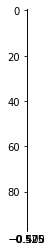

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


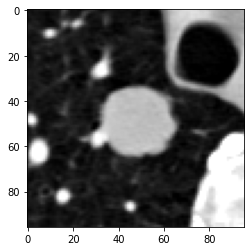

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


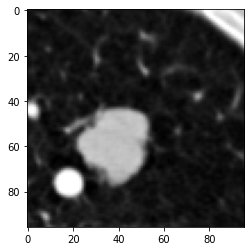

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


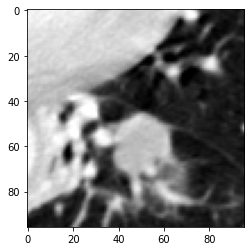

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


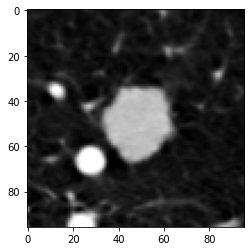

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


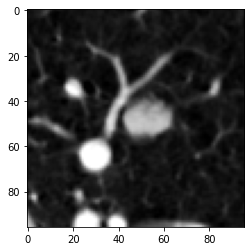

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


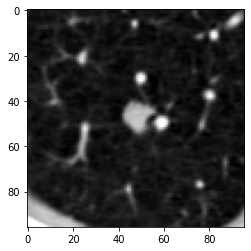

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


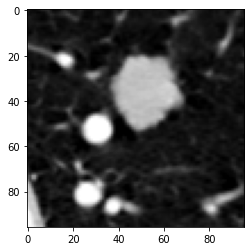

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


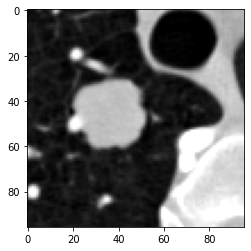

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


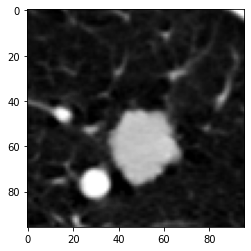

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


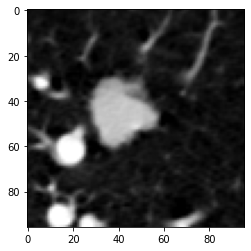

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


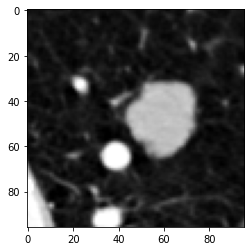

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


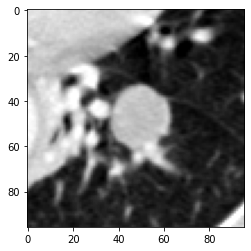

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


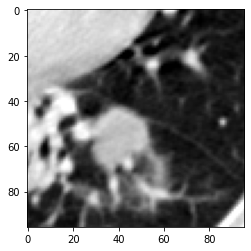

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


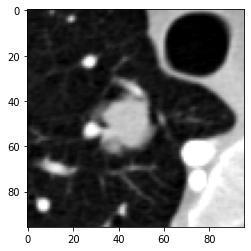

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


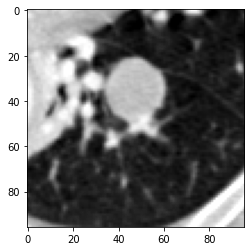

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


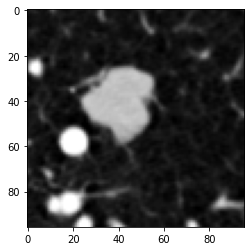

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    # print(rows)
    # print("low:",rows[0])
    # print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860


IndexError: ignored

In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]
    candidate_path = '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv'  
    cands = readcsv(candidate_path)
    
    for cand in cands[low:high]:
        print(cand)
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 96
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        new_img = np.expand_dims(patch,axis = -1)
        cancer_image_data.append(new_img)
        cancer_image_labels.append(1)

#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.9820915', '-175.1767895', '-298.5101925', '1']
[-298.5101925 -175.1767895 -128.9820915]
[ 77.71656178 211.78327738  44.52171792]
[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


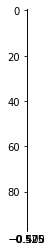

count: 1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
count: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '1.859782975', '172.2215339', '-405.3664466', '1']
[-405.3664466   172.2215339     1.85978297]
[251.6335534  292.36299065 219.0088982 ]
[[0.06142857 0.06785714 0.07       ... 0.63285714 0.66071429 0.65714286]
 [0.07357143 0.07285714 0.05642857 ... 0.635      0.66714286 0.65928571]
 [0.08571429 0.08857143 0.07       ... 0.65928571 0.66571429 0.64785714]
 ...
 [0.11071429 0.11714286 0.13714286 ... 0.98       0.97928571 0.96357143]
 [0.10142857 0.08142857 0.08285714 ... 0.95357143 0.93785714 0.94142857]
 [0.10142857 0.09285714 0.09285714 ... 0.99785714 1.         1.        ]]


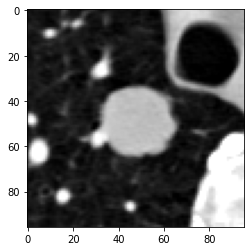

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.927241', '143.0742561', '-425', '1']
[-425.         143.0742561   95.927241 ]
[232.         240.00016176 388.00026139]
[[0.08357143 0.08928571 0.08642857 ... 0.75071429 0.74214286 0.75857143]
 [0.05857143 0.06142857 0.08214286 ... 0.78214286 0.75357143 0.74142857]
 [0.055      0.065      0.07642857 ... 0.86642857 0.79357143 0.74642857]
 ...
 [0.20142857 0.195      0.17357143 ... 0.04214286 0.07142857 0.08785714]
 [0.17071429 0.12428571 0.13142857 ... 0.04428571 0.04928571 0.06357143]
 [0.16642857 0.10714286 0.13       ... 0.05642857 0.05428571 0.04785714]]


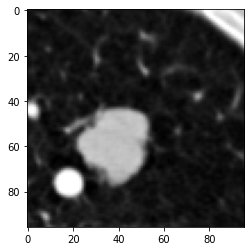

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '190.84', '-516.82', '1']
[-516.82  190.84   89.32]
[140.18       325.81090167 376.13041089]
[[0.90857143 0.93928571 0.93714286 ... 0.08142857 0.13142857 0.11642857]
 [0.91785714 0.94928571 0.96714286 ... 0.10928571 0.16285714 0.15142857]
 [0.94071429 0.95928571 0.95214286 ... 0.13571429 0.16214286 0.13142857]
 ...
 [0.06142857 0.055      0.06214286 ... 0.12071429 0.07928571 0.085     ]
 [0.06571429 0.05142857 0.05857143 ... 0.08928571 0.08642857 0.13928571]
 [0.02785714 0.03285714 0.06       ... 0.04785714 0.12285714 0.26785714]]


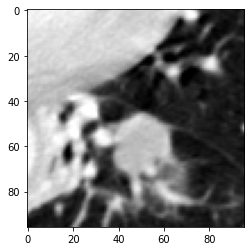

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.79489138', '148.8604968', '-426.7860495', '1']
[-426.7860495   148.8604968    90.79489138]
[230.2139505  250.39509242 378.78004032]
[[0.07214286 0.07928571 0.09071429 ... 0.03785714 0.04357143 0.03214286]
 [0.08214286 0.08357143 0.10428571 ... 0.035      0.02714286 0.02357143]
 [0.11357143 0.115      0.13357143 ... 0.035      0.01142857 0.02142857]
 ...
 [0.19214286 0.07285714 0.05357143 ... 0.29785714 0.215      0.14428571]
 [0.22       0.02428571 0.01642857 ... 0.34785714 0.20714286 0.08642857]
 [0.35571429 0.09857143 0.03857143 ... 0.28642857 0.18357143 0.08928571]]


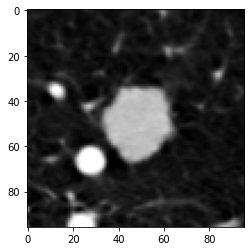

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '150.3105891', '-434', '1']
[-434.         150.3105891   88.690908 ]
[223.         253.00017051 375.00025263]
[[0.06357143 0.06785714 0.08142857 ... 0.13571429 0.135      0.105     ]
 [0.06928571 0.06142857 0.06785714 ... 0.12785714 0.14571429 0.10928571]
 [0.08285714 0.07428571 0.07571429 ... 0.13285714 0.14785714 0.11142857]
 ...
 [0.71714286 0.61       0.43571429 ... 0.07428571 0.07071429 0.06142857]
 [0.74428571 0.67071429 0.53285714 ... 0.07428571 0.07714286 0.08357143]
 [0.77071429 0.72571429 0.62642857 ... 0.06857143 0.07357143 0.08785714]]


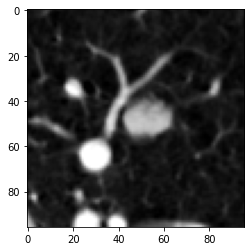

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-23.85157656', '192.9822641', '-391.4338081', '1']
[-391.4338081   192.9822641   -23.85157656]
[265.5661919  329.65946034 172.81866633]
[[0.24285714 0.115      0.06928571 ... 0.19571429 0.23642857 0.24285714]
 [0.17357143 0.08357143 0.05785714 ... 0.37571429 0.35357143 0.27785714]
 [0.14642857 0.09357143 0.08285714 ... 0.54714286 0.46357143 0.32785714]
 ...
 [1.         1.         1.         ... 0.64928571 0.66642857 0.68857143]
 [1.         1.         1.         ... 0.68857143 0.71642857 0.74785714]
 [0.895      1.         1.         ... 0.77142857 0.78285714 0.79142857]]


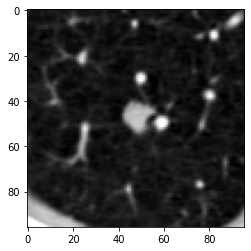

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '88.690908', '156.4336401', '-428', '1']
[-428.         156.4336401   88.690908 ]
[229.         264.00017792 375.00025263]
[[0.09357143 0.06142857 0.045      ... 0.20428571 0.14714286 0.075     ]
 [0.08142857 0.05       0.05071429 ... 0.20714286 0.12571429 0.08      ]
 [0.07357143 0.065      0.07714286 ... 0.18142857 0.12928571 0.10428571]
 ...
 [0.98928571 0.97357143 0.88571429 ... 0.28642857 0.29785714 0.22071429]
 [1.         0.97714286 0.90071429 ... 0.22214286 0.23785714 0.165     ]
 [0.98071429 0.965      0.93785714 ... 0.17785714 0.19       0.10357143]]


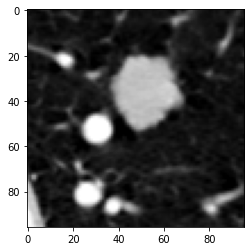

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '8.8', '174.74', '-401.87', '1']
[-401.87  174.74    8.8 ]
[255.13       296.8873929  231.47693721]
[[0.05857143 0.04785714 0.06       ... 0.69214286 0.7        0.7       ]
 [0.035      0.04357143 0.05785714 ... 0.71071429 0.71071429 0.71571429]
 [0.04428571 0.05714286 0.05785714 ... 0.70857143 0.69714286 0.70714286]
 ...
 [0.09214286 0.085      0.07       ... 0.75285714 0.76285714 0.75357143]
 [0.10428571 0.09785714 0.09714286 ... 0.72928571 0.72285714 0.73071429]
 [0.08642857 0.07285714 0.06857143 ... 0.73       0.74857143 0.75214286]]


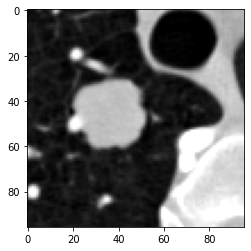

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.32', '143.23', '-427.1', '1']
[-427.1   143.23   89.32]
[229.9        240.27995431 376.13041089]
[[0.13       0.18785714 0.19142857 ... 1.         1.         0.90714286]
 [0.08       0.14714286 0.20285714 ... 1.         1.         1.        ]
 [0.05642857 0.09       0.13571429 ... 0.71571429 0.92       1.        ]
 ...
 [0.02571429 0.         0.00285714 ... 0.06642857 0.08071429 0.11714286]
 [0.05357143 0.         0.         ... 0.10714286 0.075      0.07857143]
 [0.08785714 0.06857143 0.06928571 ... 0.12857143 0.06857143 0.03857143]]


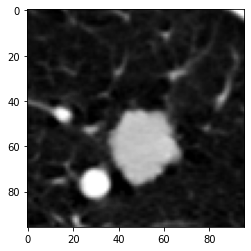

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '95.706941', '151.6702946', '-429.955', '1']
[-429.955      151.6702946   95.706941 ]
[227.045      255.44286952 387.60449437]
[[0.06142857 0.05428571 0.05714286 ... 0.05642857 0.04428571 0.03785714]
 [0.04571429 0.05571429 0.07357143 ... 0.03       0.01785714 0.02      ]
 [0.05785714 0.06928571 0.06928571 ... 0.025      0.03071429 0.03357143]
 ...
 [0.08857143 0.1        0.09428571 ... 0.03642857 0.02714286 0.04785714]
 [0.06071429 0.05928571 0.055      ... 0.04       0.04285714 0.04571429]
 [0.06       0.035      0.025      ... 0.06428571 0.07357143 0.07      ]]


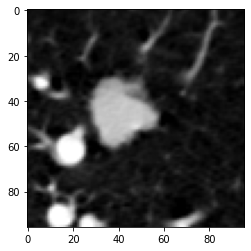

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '84.4005695', '150.2070126', '-425.35', '1']
[-425.35       150.2070126   84.4005695]
[231.65       252.81409624 367.29269715]
[[0.05785714 0.06071429 0.06357143 ... 0.08571429 0.08642857 0.08285714]
 [0.06857143 0.06714286 0.07714286 ... 0.09       0.08214286 0.07571429]
 [0.08642857 0.09285714 0.09071429 ... 0.07642857 0.07357143 0.07642857]
 ...
 [0.97285714 0.98071429 0.98785714 ... 0.09       0.17571429 0.30142857]
 [0.94928571 0.98357143 0.98928571 ... 0.16357143 0.24714286 0.35642857]
 [0.95857143 0.98214286 0.97785714 ... 0.19571429 0.28142857 0.35428571]]


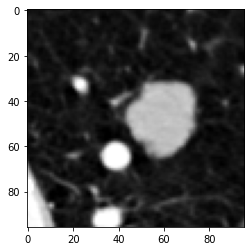

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.25124712', '197.6118366', '-514.4719779', '1']
[-514.4719779   197.6118366    89.25124712]
[142.5280221  337.97644672 376.00689695]
[[0.89       0.88       0.875      ... 0.09714286 0.08785714 0.075     ]
 [0.87214286 0.87428571 0.87285714 ... 0.085      0.10428571 0.10428571]
 [0.87642857 0.88071429 0.89214286 ... 0.05214286 0.08071429 0.12142857]
 ...
 [0.12857143 0.165      0.175      ... 0.84357143 0.82714286 0.81571429]
 [0.15357143 0.215      0.24714286 ... 0.79928571 0.78142857 0.78857143]
 [0.13785714 0.14714286 0.20785714 ... 0.835      0.83428571 0.85285714]]


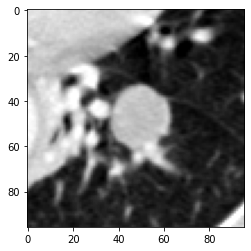

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '192.0586641', '-518', '1']
[-518.         192.0586641   94.813959 ]
[139.         328.00022104 386.00026004]
[[0.96357143 0.915      0.90928571 ... 0.09428571 0.09785714 0.145     ]
 [0.89357143 0.89357143 0.91357143 ... 0.09142857 0.10785714 0.12857143]
 [0.87       0.915      0.91357143 ... 0.055      0.08571429 0.12071429]
 ...
 [0.15928571 0.10142857 0.08142857 ... 0.80857143 0.82571429 0.87357143]
 [0.095      0.07071429 0.09642857 ... 0.81642857 0.84785714 0.94071429]
 [0.09714286 0.09142857 0.12285714 ... 0.87142857 0.93071429 1.        ]]


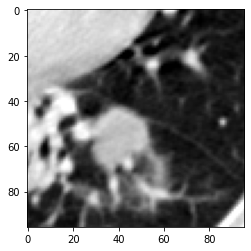

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '5.99', '171.94', '-398.37', '1']
[-398.37  171.94    5.99]
[258.63       291.85721746 226.42879686]
[[0.12428571 0.10071429 0.07428571 ... 0.64214286 0.65357143 0.66571429]
 [0.10142857 0.08571429 0.07142857 ... 0.66285714 0.67142857 0.66571429]
 [0.09142857 0.06714286 0.06571429 ... 0.66785714 0.67071429 0.655     ]
 ...
 [0.09142857 0.09       0.08214286 ... 0.96785714 0.94142857 0.93      ]
 [0.13071429 0.10285714 0.08571429 ... 0.95928571 0.89357143 0.85857143]
 [0.1        0.09071429 0.09       ... 0.86285714 0.81214286 0.77785714]]


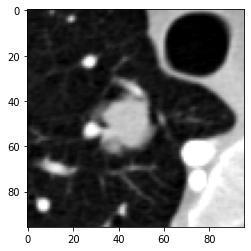

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.818736', '204.227383', '-513.455', '1']
[-513.455     204.227383   90.818736]
[143.545      349.8612178  378.82287697]
[[0.83714286 0.79357143 0.77857143 ... 0.09071429 0.13       0.10571429]
 [0.89857143 0.83857143 0.79571429 ... 0.085      0.15928571 0.16142857]
 [0.95142857 0.91       0.84714286 ... 0.06857143 0.16142857 0.24928571]
 ...
 [0.71214286 0.69       0.67071429 ... 0.74714286 0.76357143 0.75714286]
 [0.76714286 0.72785714 0.70571429 ... 0.73928571 0.755      0.74571429]
 [0.89714286 0.80928571 0.73642857 ... 0.74928571 0.75357143 0.75357143]]


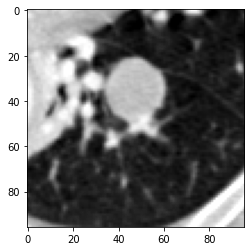

['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '94.813959', '153.0937941', '-424', '1']
[-424.         153.0937941   94.813959 ]
[233.         258.00017388 386.00026004]
[[0.09357143 0.13285714 0.13714286 ... 0.05571429 0.10714286 0.19214286]
 [0.08071429 0.09785714 0.12       ... 0.015      0.05071429 0.10142857]
 [0.06       0.06       0.07857143 ... 0.02285714 0.045      0.06928571]
 ...
 [0.07857143 0.06285714 0.05857143 ... 0.04071429 0.05857143 0.13285714]
 [0.06642857 0.08285714 0.09357143 ... 0.06928571 0.06285714 0.11142857]
 [0.08428571 0.09857143 0.08857143 ... 0.075      0.08071429 0.115     ]]


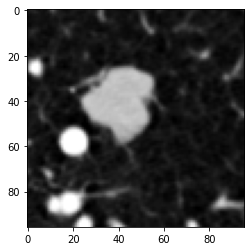

count: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
[21]
low: 21
high: 21
count: 4
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
[22, 23, 24]
low: 22
high: 24
['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '96.28467267', '19.03486907', '-88.47844082', '1']
[-88.47844082  19.03486907  96.28467267]
[122.40862367 278.14966583 343.95307365]
[[0.80642857 0.78571429 0.77785714 ... 0.63142857 0.62285714 0.63714286]
 [0.82071429 0.805      0.78571429 ... 0.62285714 0.61857143 0.62      ]
 [0.80071429 0.81142857 0.81357143 ... 0.63714286 0.63285714 0.61714286]
 ...
 [0.13142857 0.11285714 0.10642857 ... 0.74357143 0.725      0.73357143]
 [0.08857143 0.06428571 0.06428571 ... 0.71714286 0.72857143 0.74285714]
 [0.07857143 0.08214286 0.08571429 ... 0.74785714 0.73785714 0.74214286]]


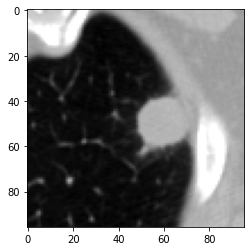

['1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', '106.18', '12.61', '-96.81', '1']
[-96.81  12.61 106.18]
[119.076      270.67345455 355.46763636]
[[1.         0.83714286 0.65357143 ... 0.62785714 0.635      0.625     ]
 [1.         0.98928571 0.76       ... 0.62571429 0.635      0.62428571]
 [1.         1.         0.86714286 ... 0.63642857 0.63642857 0.62285714]
 ...
 [0.05142857 0.05214286 0.07       ... 0.71285714 0.72071429 0.73214286]
 [0.06071429 0.06285714 0.06928571 ... 0.73571429 0.73857143 0.74714286]
 [0.06785714 0.06285714 0.06785714 ... 0.71142857 0.71071429 0.72642857]]


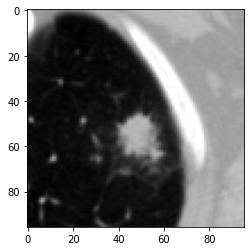

count: 5
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
[25]
low: 25
high: 25
count: 6
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
[26]
low: 26
high: 26
count: 7
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774
[27]
low: 27
high: 27
count: 8
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
[28, 29]
low: 28
high: 29
['1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949', '-70.748125', '67.2790625', '-160.9525', '1']
[-160.9525      67.2790625  -70.748125 ]
[ 89.438  342.1172 165.4424]
[[0.81285714 0.76       0.86714286 ... 0.70357143 0.72928571 0.78928571]
 [0.82714286 0.78071429 0.83642857 ... 0.86928571 0.925      0.84857143]
 [0.81571429 0.80928571 0.76571429 ... 0.99857143 0.99571429 0.94071429]
 ...
 [0.66928571 0.645      0.65642857 ... 0.63071429 0.65071429 0.69214286]
 [0.65428571 0.61285714 0.62285714 ... 0.63428571 0.65357143 0.66071429]
 [0.68714286 0.63642857 0.64357143 ... 0.635      0.67928

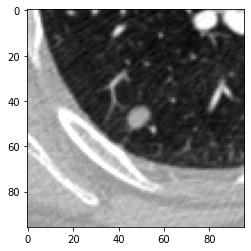

count: 9
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872
[30]
low: 30
high: 30
count: 10
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375
[31]
low: 31
high: 31
count: 11
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943
[32, 33, 34, 35]
low: 32
high: 35
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-102.5', '-74', '-220', '1']
[-220.   -74.  -102.5]
[ 62.         154.96530811 116.05331444]
[[0.06285714 0.05285714 0.01       ... 0.70071429 0.55571429 0.69142857]
 [0.         0.09785714 0.03785714 ... 0.61428571 0.82428571 0.72357143]
 [0.085      0.         0.         ... 0.83071429 0.77071429 0.69357143]
 ...
 [1.         0.81571429 0.86571429 ... 0.05928571 0.00857143 0.08      ]
 [0.895      0.89857143 0.91071429 ... 0.12357143 0.16714286 0.09285714]
 [0.97928571 0.90642857 0.97       ... 0.13785714 0.08357143 0.09142857]]


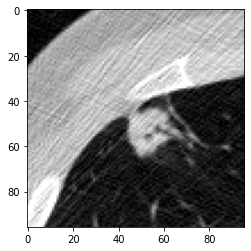

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-97.54122491', '-73.36723259', '-222.9974028', '1']
[-222.9974028   -73.36723259  -97.54122491]
[ 59.60207776 155.82924641 122.82369427]
[[0.015      0.07428571 0.02785714 ... 0.80714286 0.80785714 0.72071429]
 [0.125      0.00428571 0.05142857 ... 0.77714286 0.69428571 0.77571429]
 [0.05071429 0.02642857 0.02571429 ... 0.78928571 0.80857143 0.79357143]
 ...
 [0.62071429 0.17928571 0.04142857 ... 0.16714286 0.22071429 0.37357143]
 [0.455      0.12928571 0.10857143 ... 0.32857143 0.36571429 0.43357143]
 [0.225      0.15428571 0.08785714 ... 0.28142857 0.26785714 0.43071429]]


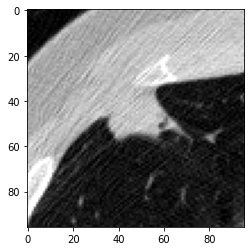

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943', '-100.9691565', '-66.4213815', '-217.94', '1']
[-217.94       -66.4213815 -100.9691565]
[ 63.648      165.31264689 118.14342576]
[[0.         0.06785714 0.05285714 ... 0.57571429 0.58571429 0.71071429]
 [0.         0.         0.         ... 0.62       0.79214286 0.72285714]
 [0.04857143 0.03285714 0.         ... 0.79785714 0.72714286 0.76714286]
 ...
 [1.         0.72571429 0.50714286 ... 0.02071429 0.04785714 0.09928571]
 [0.835      0.60571429 0.43642857 ... 0.10428571 0.05285714 0.01      ]
 [0.66642857 0.56857143 0.17285714 ... 0.04928571 0.00857143 0.12428571]]


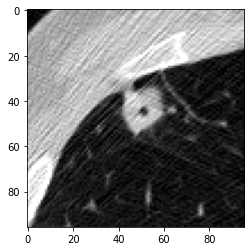

count: 12
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
[36, 37, 38, 39, 40, 41]
low: 36
high: 41
['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-68.88594854', '-80.49293991', '-190.126323', '1']
[-190.126323    -80.49293991  -68.88594854]
[113.373677   427.27940247 133.46901402]
[[0.08642857 0.20357143 0.26357143 ... 0.21785714 0.28214286 0.52142857]
 [0.145      0.29428571 0.27428571 ... 0.13285714 0.14285714 0.41285714]
 [0.15571429 0.20214286 0.16928571 ... 0.06928571 0.07642857 0.30142857]
 ...
 [0.59285714 0.61714286 0.61785714 ... 1.         1.         1.        ]
 [0.61714286 0.61642857 0.60071429 ... 1.         0.96       0.85071429]
 [0.65785714 0.66428571 0.64       ... 0.77428571 0.74357143 0.68357143]]


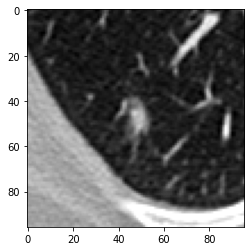

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '101.25', '-180.465', '-224.345', '1']
[-224.345 -180.465  101.25 ]
[ 79.155      262.16425806 414.46774194]
[[0.93071429 0.90571429 0.93857143 ... 0.86571429 0.72357143 0.69357143]
 [0.855      0.86       0.90071429 ... 0.83357143 0.715      0.69928571]
 [0.855      0.89071429 0.92142857 ... 0.84785714 0.73928571 0.74071429]
 ...
 [0.65571429 0.62214286 0.60357143 ... 0.33928571 0.55642857 0.64928571]
 [0.695      0.67785714 0.62642857 ... 0.39428571 0.59       0.65      ]
 [0.66428571 0.67428571 0.61928571 ... 0.41714286 0.61571429 0.65857143]]


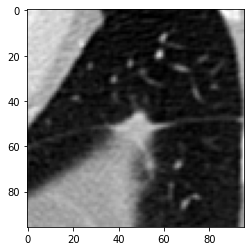

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-46.54104772', '-66.80022363', '-207.6218183', '1']
[-207.6218183   -66.80022363  -46.54104772]
[ 95.8781817  449.89446936 170.37414054]
[[0.13       0.11       0.07571429 ... 0.34928571 0.67       1.        ]
 [0.10714286 0.11357143 0.10714286 ... 0.36714286 0.67785714 1.        ]
 [0.07571429 0.09928571 0.10714286 ... 0.36142857 0.69285714 0.95      ]
 ...
 [0.66       0.64571429 0.63357143 ... 0.63142857 0.61071429 0.66285714]
 [0.66714286 0.675      0.65714286 ... 0.59785714 0.59357143 0.62642857]
 [0.65142857 0.66714286 0.665      ... 0.61357143 0.63071429 0.63357143]]


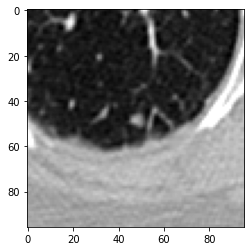

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '-107.1644726', '-146.6638704', '-186.3209291', '1']
[-186.3209291 -146.6638704 -107.1644726]
[117.1790709  317.99063986  70.24770977]
[[0.64       0.61857143 0.64357143 ... 0.07071429 0.06642857 0.08357143]
 [0.63428571 0.59857143 0.62428571 ... 0.06071429 0.02714286 0.01714286]
 [0.61928571 0.605      0.62571429 ... 0.17       0.09214286 0.025     ]
 ...
 [0.73642857 0.77357143 0.75928571 ... 0.10285714 0.08785714 0.02214286]
 [0.69142857 0.685      0.74785714 ... 0.06642857 0.06357143 0.04214286]
 [0.68214286 0.7        0.73285714 ... 0.05285714 0.04928571 0.05928571]]


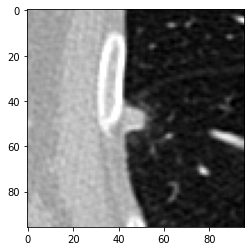

['1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306', '122.3370789', '-175.9876589', '-194.1075', '1']
[-194.1075    -175.9876589  122.3370789]
[109.3925     269.5590924  449.29543354]
[[0.01357143 0.03428571 0.09285714 ... 0.64714286 0.66714286 0.67428571]
 [0.06928571 0.09285714 0.09285714 ... 0.61785714 0.63214286 0.645     ]
 [0.07571429 0.08       0.04571429 ... 0.64071429 0.63214286 0.62857143]
 ...
 [0.08785714 0.07071429 0.05785714 ... 0.60857143 0.61       0.59285714]
 [0.08142857 0.07928571 0.07428571 ... 0.645      0.65285714 0.63      ]
 [0.085      0.10357143 0.08214286 ... 0.67071429 0.66642857 0.64785714]]


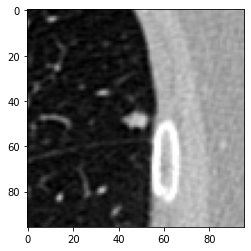

count: 13
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[42]
low: 42
high: 42
count: 14
1.3.6.1.4.1.14519.5.2.1.6279.6001.108231420525711026834210228428
[43]
low: 43
high: 43
count: 15
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[44, 45]
low: 44
high: 45
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059', '45.51700818', '48.78923112', '-109.2052766', '1']
[-109.2052766    48.78923112   45.51700818]
[ 67.83577872 286.22670939 424.9364149 ]
[[0.78642857 0.81       0.93071429 ... 0.56571429 0.54571429 0.485     ]
 [0.71928571 0.63714286 0.715      ... 0.79285714 0.89       0.74785714]
 [0.90571429 0.63928571 0.91428571 ... 0.51428571 0.49428571 0.65571429]
 ...
 [0.13642857 0.04571429 0.05357143 ... 0.60428571 0.73642857 0.68428571]
 [0.21       0.21857143 0.11714286 ... 0.68       0.56357143 0.64214286]
 [0.30285714 0.40285714 0.22928571 ... 0.55357143 0.55785714 0.51642857]]


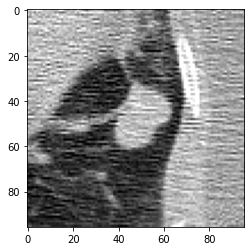

count: 16
1.3.6.1.4.1.14519.5.2.1.6279.6001.110678335949765929063942738609
[46, 47]
low: 46
high: 47
['1.3.6.1.4.1.14519.5.2.1.6279.6001.110678335949765929063942738609', '-39.845', '-101.77', '-135.615', '1']
[-135.615 -101.77   -39.845]
[417.77       307.67963899 183.6998556 ]
[[0.04142857 0.05285714 0.05214286 ... 0.         0.         0.        ]
 [0.00285714 0.03285714 0.03785714 ... 0.         0.         0.        ]
 [0.01285714 0.03785714 0.04714286 ... 0.         0.         0.        ]
 ...
 [0.05857143 0.06428571 0.07428571 ... 1.         0.98857143 0.9       ]
 [0.03571429 0.04071429 0.04714286 ... 1.         1.         0.94642857]
 [0.03142857 0.02071429 0.01714286 ... 1.         1.         0.97785714]]


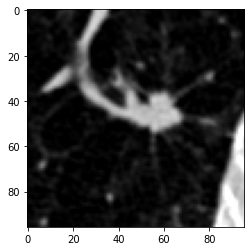

count: 17
1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[48]
low: 48
high: 48
count: 18
1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028
[49, 50]
low: 49
high: 50
['1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028', '-80.6924049', '11.00880374', '-28.8572152', '1']
[-28.8572152   11.00880374 -80.6924049 ]
[228.71422784 311.69409078 167.53214256]
[[0.81071429 0.87714286 0.605      ... 0.02714286 0.09071429 0.02214286]
 [1.         0.94642857 0.98428571 ... 0.02714286 0.05071429 0.12214286]
 [0.68428571 0.77       0.88357143 ... 0.04785714 0.10785714 0.07285714]
 ...
 [0.57142857 0.88571429 0.975      ... 0.82571429 0.58928571 0.45214286]
 [0.69642857 0.49714286 0.59357143 ... 1.         1.         0.92357143]
 [1.         1.         1.         ... 0.23857143 0.46857143 0.69785714]]


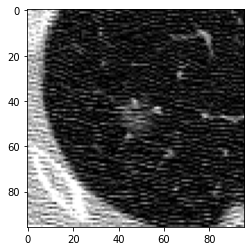

count: 19
1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962
[51, 52, 53]
low: 51
high: 53
['1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962', '15.772263', '83.688848', '-146.0625', '1']
[-146.0625     83.688848   15.772263]
[133.15       391.59681826 290.30419212]
[[0.87642857 0.755      0.93571429 ... 0.07285714 0.14571429 0.        ]
 [0.73428571 0.93285714 0.93214286 ... 0.         0.         0.05285714]
 [0.67285714 0.86714286 0.73928571 ... 0.15071429 0.05642857 0.12857143]
 ...
 [0.70571429 0.62857143 0.62142857 ... 0.57928571 0.52285714 0.53785714]
 [0.72857143 0.56285714 0.62285714 ... 0.61785714 0.55785714 0.74785714]
 [0.75642857 0.59571429 0.775      ... 0.77571429 0.81142857 0.68857143]]


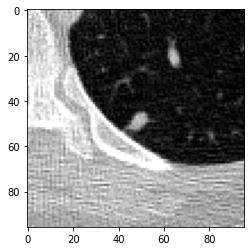

['1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962', '99.264953', '9.316474', '-182.9', '1']
[-182.9         9.316474   99.264953]
[103.68       271.09483703 425.58338279]
[[0.02357143 0.         0.         ... 0.58857143 0.70571429 0.51142857]
 [0.         0.01428571 0.12642857 ... 0.615      0.63214286 0.61071429]
 [0.06214286 0.165      0.02       ... 0.60785714 0.67357143 0.54642857]
 ...
 [0.         0.04285714 0.         ... 0.60785714 0.67857143 0.66714286]
 [0.         0.         0.07142857 ... 0.49       0.62142857 0.61642857]
 [0.05785714 0.         0.         ... 0.61142857 0.66857143 0.61      ]]


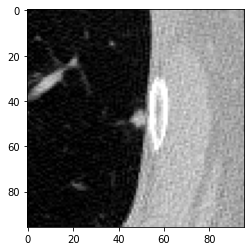

count: 20


KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
        print('count:',count)

In [ ]:
print(len(cancer_image_data), len(cancer_image_labels))

946 957


In [ ]:
cancernodule_image_900_96_96 = np.asarray(cancer_image_data[:900])

In [ ]:
plt.imshow(cancernodule_image.reshape(96,96))

ValueError: ignored

In [ ]:
cancer_image_data.pop(671)

array([], shape=(96, 0, 1), dtype=float64)

In [ ]:
cancernodule_image_900_96_96.shape

(900, 96, 96, 1)

In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_96_96_patches.npy",cancernodule_image_900_96_96)

saving data


In [ ]:
cancernodule_image_900 = np.asarray(cancer_image_data[0:900])
print(cancernodule_image_900.shape)

(900, 65, 65, 1)


In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_slices.npy",cancernodule_image_900)

saving data


In [ ]:
print(np.load('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_900_slices.npy').shape)

(900, 65, 65, 1)


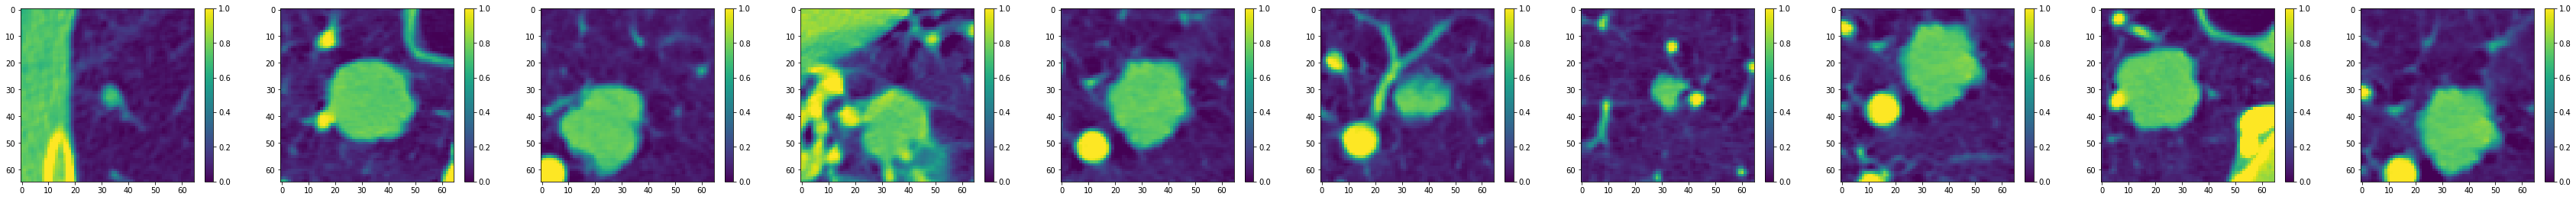

In [ ]:
fig = plt.figure(figsize=(60,300))

for i in range(0,10):
  y = fig.add_subplot(60,10,i+1)
  try:
    plt.imshow(cancernodule_image[i].reshape(65,65))
    plt.colorbar()
  except:
    continue

In [ ]:
plt.imshow(cancernodule_image.reshape(65,65))

ValueError: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
print(count)

RuntimeError: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/demo_two.csv')
print(count)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(cancer_image_data), len(cancer_image_labels))

556 556


In [ ]:
type(cancer_image_data)

list

In [ ]:
cancer_image_data.pop(63)

array([], shape=(65, 0, 1), dtype=float64)

In [ ]:
cancernodule_image = np.asarray(cancer_image_data[0:500])

In [ ]:
cancernodule_image.shape

(500, 65, 65, 1)

In [ ]:
fig = plt.figure(figsize=(20,200))

for i in range(0,556):
  y = fig.add_subplot(60,10,i+1)
  try:
    plt.imshow(cancernodule_image[i].reshape(65,65))
  except:
    continue

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cancernodule_image = np.array(cancer_image_data)
cancernodule_labels = np.array(cancer_image_labels)
print(cancernodule_image.shape, cancernodule_labels.shape, cancernodule_labels[0].shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: ignored

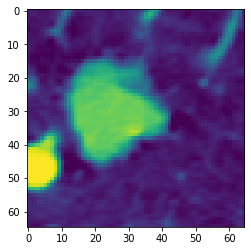

In [ ]:
plt.imshow(cancernodule_image.reshape(65,65))

In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_new_500.npy",cancernodule_image)

saving data


In [ ]:
print(np.load('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancernodule_image_new_500.npy').shape)

(500, 65, 65, 1)


In [ ]:
test_cancernodule_image = np.array(cancer_image_data[500:550])
print(test_cancernodule_image.shape)

(50, 65, 65, 1)


In [ ]:
from numpy import save
print("saving data")
save("/content/drive/MyDrive/Ramasubramanya/LotusFeet/test_cancernodule_image_new_500.npy",test_cancernodule_image)

saving data


In [ ]:
cancer_image_data = []
cancer_image_labels = []
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)
    
    if 
    print(rows)
    print("low:",rows[0])
    print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

#     cands = readcsv(cand_path)
    
#     for cand in cands[low:high]:
#         world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
#         voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
#         voxel_width = 65
#         #a rectangle slice of height x width at depth
#         patch = numpy_image[int(voxel_coord[0]),
#                             int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
#                             int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
#         patch = normalize_planes(patch)
        
#         print(world_coord)
#         print(voxel_coord)
#         print(patch)
        
#         new_img = np.expand_dims(patch,axis = -1)
#         cancer_image_data.append(new_img)
#         cancer_image_labels.append(1)

# #         output_dir = 'patches/'
#         plt.imshow(patch, cmap = 'gray')
#         plt.show()
# #         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
# #                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
low: 1
high: 2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
low: 3
high: 3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
low: 4
high: 20
1.3.6.1.4.1.14519.5.2.

KeyboardInterrupt: ignored

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
[1, 2]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
[3]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1.3.6.1.4.1.14519.5

KeyboardInterrupt: ignored

In [ ]:
rows=[]
p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as o:
      myData = csv.reader(o)
      for row in myData:
        if row[0] == p:
          rows.append(myData.line_num)

print(rows)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/cancercell_location.csv')
print(count)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6

KeyboardInterrupt: ignored

In [ ]:
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    file_name = img_path.rsplit('/', 1)
    file_name2 = file_name[1].rsplit('.',1)
    p = file_name2[0]
    print(p)

    rows=[]
    #p = '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405'
    with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv') as o:
          myData = csv.reader(o)
          for row in myData:
            if row[0] == p:
              rows.append(myData.line_num)

    # print(rows)
    # print("low:",rows[0])
    # print("high:",rows[(len(rows)-1)])
    low = rows[0]
    high = rows[(len(rows)-1)]

    cands = readcsv(cand_path)
    
    for cand in cands[low:high]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))
    

In [ ]:
count = 0
main_file = '/content/drive/MyDrive/Luna16/subset0/'
with open('/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv') as k:
      myData = csv.reader(k)
      for row in myData:
        #print(main_file+row[0]+'.mhd')
        count+=1
        #print(main_file+row) 
        visualize_cand(main_file+row[0]+'.mhd', 
        '/content/drive/MyDrive/Ramasubramanya/LotusFeet/noncancercell_location.csv')
print(count)

Output hidden; open in https://colab.research.google.com to view.